In [1]:
!pip install bing-image-downloader


In [4]:
from bing_image_downloader import downloader


In [5]:
downloader.download('fruits', limit=20 , output_dir='images', adult_filter_off=True)



[!!]Indexing page: 1

[%] Indexed 20 Images on Page 1.


[%] Downloading Image #1 from http://www.fruitsinfo.com/fruit-facts/wp-content/uploads/2010/08/fruit.jpg
[Error]Invalid image, not saving http://www.fruitsinfo.com/fruit-facts/wp-content/uploads/2010/08/fruit.jpg

[!] Issue getting: http://www.fruitsinfo.com/fruit-facts/wp-content/uploads/2010/08/fruit.jpg
[!] Error:: No active exception to reraise
[%] Downloading Image #1 from http://www.barbiemartini.com/wp-content/uploads/2014/07/Top-Fruits-Vegetables.jpg
[%] File Downloaded !

[%] Downloading Image #2 from http://attemptnwin.com/wp-content/uploads/2014/10/fruits3.png
[%] File Downloaded !

[%] Downloading Image #3 from http://1.bp.blogspot.com/-HeoNA5riosQ/ThsX8IyX1FI/AAAAAAAAAX0/_nrhKhKZED4/s1600/Exotic%2BFruits-748648.jpg
[%] File Downloaded !

[%] Downloading Image #4 from https://wallpapertag.com/wallpaper/full/1/4/9/964532-fruits-basket-wallpapers-1242x2208-for-phones.jpg
[%] File Downloaded !

[%] Downloading Image #5

In [6]:
downloader.download('furniture', limit=20 , output_dir='images', adult_filter_off=True)



[!!]Indexing page: 1

[%] Indexed 20 Images on Page 1.


[%] Downloading Image #1 from https://www.original-antique-furniture.com/wp-content/uploads/sites/3/2019/06/image5.jpeg
[%] File Downloaded !

[%] Downloading Image #2 from http://www.visithomefurniture.com/new/wp-content/uploads/2020/02/19504-38-35-08-T814-1024x740.jpg
[%] File Downloaded !

[%] Downloading Image #3 from https://sodafine.com/wp-content/uploads/2019/06/baker-furniture-sofas.jpg
[%] File Downloaded !

[%] Downloading Image #4 from https://aarsunwoods.com/wp-content/uploads/2020/02/Wooden-Royal-Bedroom-Furniture-UH-ROYAL-0013.jpg
[%] File Downloaded !

[%] Downloading Image #5 from https://couponcravings.com/wp-content/uploads/2018/05/Ashley-Furniture-Outdoor-Furniture.jpg
[%] File Downloaded !

[%] Downloading Image #6 from https://homezonefurniture.com/images/thumbs/0013614_athena-sectional.jpeg
[%] File Downloaded !

[%] Downloading Image #7 from https://s.yimg.com/aah/yhst-96405782831295/luxurious-traditional

In [7]:
downloader.download('cars', limit=20 , output_dir='images', adult_filter_off=True)



[!!]Indexing page: 1

[%] Indexed 20 Images on Page 1.


[%] Downloading Image #1 from https://pictures.topspeed.com/IMG/jpg/201807/5-modern-sports-cars.jpg
[%] File Downloaded !

[%] Downloading Image #2 from http://s1.cdn.autoevolution.com/images/news/gallery/consumer-reports-best-worst-cars-2016_8.jpeg
[%] File Downloaded !

[%] Downloading Image #3 from https://s1.cdn.autoevolution.com/images/news/gallery/production-cars-with-the-highest-torque-numbers-for-2017_34.jpg
[%] File Downloaded !

[%] Downloading Image #4 from https://www.best-selling-cars.com/wp-content/uploads/2020/05/Jaguar-I-pace.jpg
[%] File Downloaded !

[%] Downloading Image #5 from https://static2.thethingsimages.com/wordpress/wp-content/uploads/2020/05/15-Sickest-Concept-Cars-In-2020-1.jpg
[%] File Downloaded !

[%] Downloading Image #6 from https://cdn.wccftech.com/wp-content/uploads/2015/04/Project-CARS-32.jpg
[%] File Downloaded !

[%] Downloading Image #7 from https://www.motortrend.com/uploads/sites/5/2019

In [8]:
#Preprocessing the images

import os
import matplotlib.pyplot as plt
import numpy as np
from skimage.io import imread
from skimage.transform import resize

In [9]:
Target = []
Images = []
Flattened_data = []

In [10]:
DATADIR='/content/images'

In [11]:
CATAGORIES = ['cars','fruits','furniture']

In [12]:
for catagory in CATAGORIES :
  class_num = CATAGORIES.index(catagory)
  path = os.path.join(DATADIR,catagory)
  # Now we will read the values by iterating and is stored
  for img in os.listdir(path) :
    Image_Array = imread(os.path.join(path,img))
    # plt.imshow(Image_Array) to show the images
    Image_Resized = resize(Image_Array,(150,150,3))
    # Now passing the flattened verion
    Flattened_data.append(Image_Resized.flatten())
    Images.append(Image_Resized)
    Target.append(class_num)

<BarContainer object of 3 artists>

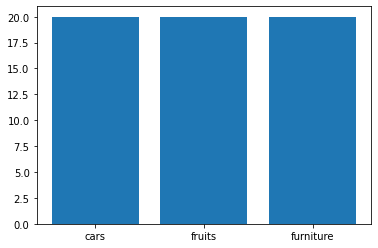

In [13]:
Flattened_data = np.array(Flattened_data)
Images = np.array(Images)
Target = np.array(Target)

unique,count = np.unique(Target,return_counts=True)
plt.bar(CATAGORIES,count)

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(Flattened_data,Target,test_size=0.2, random_state=42)

In [15]:
X_train.shape


(48, 67500)

In [16]:
y_train.shape

(48,)

In [18]:
from sklearn.model_selection import GridSearchCV
from sklearn import svm

In [19]:
param_grid = [
  {'C': [1, 10, 100, 1000], 'kernel': ['linear']},
  {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001], 'kernel': ['rbf']},
 ]
svc = svm.SVC(probability = True)
clf = GridSearchCV(svc,param_grid)
clf.fit(X_train,y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=True, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid=[{'C': [1, 10, 100, 1000], 'kernel': ['linear']},
                         {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001],
                          'kernel': ['rbf']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [20]:
y_pred = clf.predict(X_test)
y_pred

array([0, 0, 1, 0, 0, 2, 1, 2, 0, 2, 2, 2])

In [21]:
y_test

array([0, 0, 1, 2, 0, 2, 1, 2, 0, 2, 2, 2])

In [22]:
from sklearn.metrics import accuracy_score,confusion_matrix
accuracy_score(y_pred,y_test)

0.9166666666666666

In [23]:
confusion_matrix(y_pred,y_test)

array([[4, 0, 1],
       [0, 2, 0],
       [0, 0, 5]])

In [24]:
import pickle
pickle.dump(clf,open('img_model.p','wb'))

In [25]:
model = pickle.load(open("img_model.p",'rb'))

In [26]:
Flattened_data = []
url = input("Enter URL of the image")
img = imread(url)
img_resized = resize(img,(150,150,3))
Flattened_data.append(img_resized.flatten())
Flattened_data = np.array(Flattened_data)
y_out = model.predict(Flattened_data)
y_out = CATAGORIES[y_out[0]]
print("Predicted Output :")
print(y_out)

Enter URL of the imagehttps://i.insider.com/5abd52ff5c791e40008b456c?width=1300&format=jpeg&auto=webp
Predicted Output :
furniture
